In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy

In [3]:
from jax.config import config

config.update("jax_enable_x64", True)

import jax
import jax.numpy as np

In [4]:
import pycbc.waveform

In [5]:
hp1, _ = pycbc.waveform.get_td_waveform(approximant="SEOBNRv4", mass1=30, mass2=30, f_lower=20, delta_t=1/2048.)

In [6]:
hp2, _ = pycbc.waveform.get_td_waveform(approximant="SEOBNRv3", mass1=30, mass2=30, f_lower=20, delta_t=1/2048.)

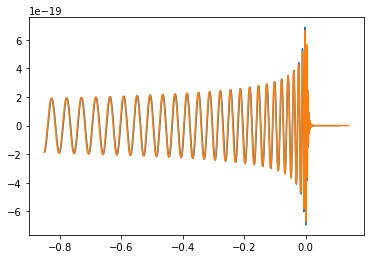

In [7]:
plt.figure()
plt.plot(hp1.sample_times, hp1)
plt.plot(hp2.sample_times, hp2)

In [8]:
def to_freq(x, y):
    """
    x: times
    y: waveform (real)
    """
    delta_t = x[1]-x[0]
    duration = len(y) * delta_t
    delta_f = 1./duration
    
#     tlen = np.int32(1./delta_f/delta_t + 0.5)
#     print(tlen)
    
    ytilde = np.fft.rfft(y)
    
    freqs = np.arange(len(ytilde)) * delta_f
    
    return freqs, ytilde*delta_t

In [9]:
x1 = np.array(hp1.sample_times.numpy())
y1 = np.array(hp1.numpy())

x2 = np.array(hp2.sample_times.numpy())
y2 = np.array(hp2.numpy())

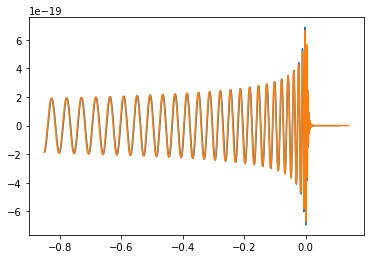

In [10]:
plt.figure()
plt.plot(x1, y1)
plt.plot(x2, y2)

In [11]:
freqs1, y1tilde = to_freq(x1, y1)

In [12]:
freqs1.shape[0]

986

In [13]:
y1tilde.shape

(986,)

In [14]:
hp1tilde = hp1.to_frequencyseries()

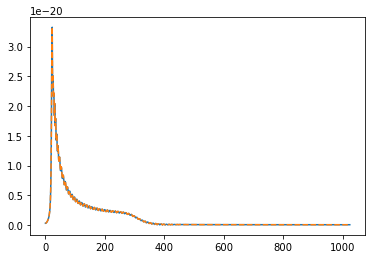

In [15]:
plt.figure()
plt.plot(freqs1, np.abs(y1tilde))
plt.plot(hp1tilde.sample_frequencies, np.abs(hp1tilde.data), ls='--')

In [17]:
y1tilde.dtype

dtype('complex128')

In [16]:
(np.abs(y1tilde)-numpy.abs(hp1tilde.data))/numpy.abs(hp1tilde.data)

DeviceArray([-3.15013452e-13, -1.08290266e-12, -2.44799289e-12,
             -6.58841968e-13,  2.70376026e-12,  3.47858371e-12,
              9.32202168e-13, -9.08534050e-13, -1.71127236e-12,
             -8.60266672e-13, -7.62001647e-13, -5.56386968e-14,
              1.98882292e-13,  6.51397069e-13,  1.80051133e-13,
             -1.46515778e-13, -5.28714392e-13, -3.17663452e-13,
             -1.38270804e-13, -6.81604616e-14, -5.37765918e-14,
             -1.11614935e-13, -4.86986071e-14, -2.12174542e-14,
             -3.17488914e-14, -5.91057896e-14,  2.01896767e-14,
             -1.32868935e-13, -1.15718145e-13, -3.49889283e-14,
             -9.29553422e-14, -1.57997850e-13, -1.66325926e-13,
             -8.72135116e-14, -2.19189366e-14, -1.92053167e-14,
             -4.59567570e-14, -2.25365893e-14, -4.61445447e-15,
             -2.03863920e-14, -4.09555223e-14, -3.10527731e-14,
              3.93008630e-15, -5.79349530e-14, -1.49286014e-13,
             -1.11004907e-13, -8.3764895